In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)

#----- the file "main.py" contains the CFPCA method, as well as other miscellaneous function ----
#----- Currently, we change directories to access the parent directory, where the main file is located ----

import os

os.chdir('..')
from main import *


# Figure 1a

Text(0.5, 1.0, 'Boys and Girls')

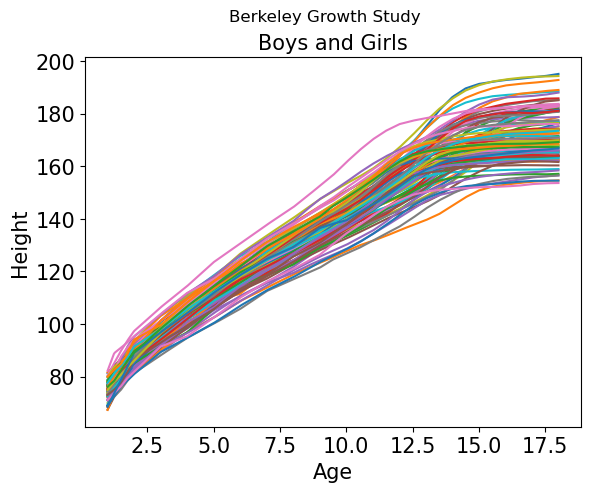

In [2]:
dataset = skfda.datasets.fetch_growth()
fd = dataset['data']
y = dataset['target']
fd.plot();
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Height", fontsize = 15)
plt.title("Boys and Girls", fontsize = 15)

# Figure 1b

<Figure size 600x500 with 0 Axes>

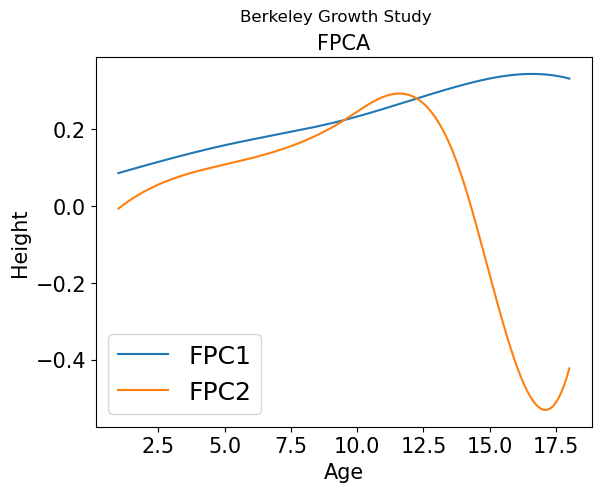

In [4]:
dataset = fetch_growth()
fd = dataset['data']
basis = skfda.representation.basis.BSplineBasis(n_basis=7)
basis_fd = fd.to_basis(basis)
fpca = FPCA(n_components=2)
fpca.fit(basis_fd)
plt.figure(figsize=(6, 5))
fpca.components_.plot();
plt.legend(['FPC1', 'FPC2'], fontsize = 18)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Height", fontsize = 15)
plt.title("FPCA", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

# Get foreground and background data

In [6]:
boys_height = fd.data_matrix[0:38]
girls_height = fd.data_matrix[39:]
boys_list = [sub_array.flatten().tolist() for sub_array in boys_height]
girls_list  = [sub_array.flatten().tolist() for sub_array in girls_height]

# Figure 1c

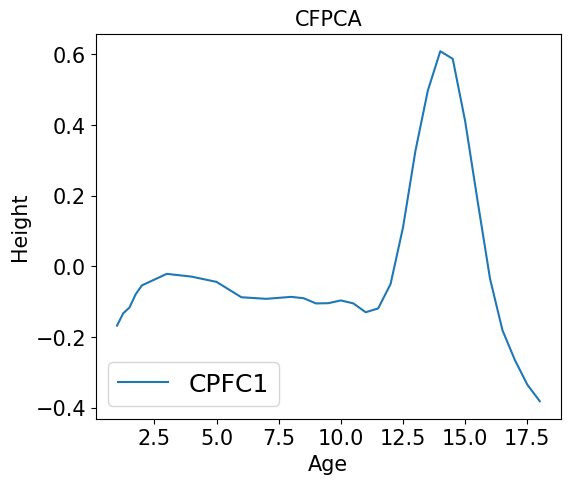

In [7]:
t = fd.grid_points[0]
components = CFPCA(boys_list, girls_list, 3, t,  False, True)[0]
plt.figure(figsize=(6, 5))
plt.plot(t,components[:,0])
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Height", fontsize = 15)
plt.title("CFPCA", fontsize = 15)
plt.legend(['CPFC1'], fontsize = 18, loc = "lower left")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();